# Assignment 3.1: Eigenmodes

This code runs part 3.1 of Assignment 3: Eigenmodes of drums or membranes of different shapes

In [1]:
import src.diagonal_matrix as dm
import numpy as np
import time

### 1.1 Matrix of eigenvalue problem

The following function creates a diagonal Matrix for the eigenvalue problem with Dirichlet boundary conditions.

In [ ]:
# The length of the system matrix
length = 4

diag_M = dm.diagonal_matrix(length)

print(diag_M)

Note: It may not be visible on the output, but the 4th position from (-4) in either direction contains a 1 such that: [..., 0, 1, 0, 0, 1, -4, 1, 0, 0, 1, 0, ...]. Except for the boundary, each row/column will contain 5 entries, alligning with the 5-point-stencil. 

We can visualize this matrix with the following function. Note that for larger values of N, you should pass the parameter text='OFF'. 

In [ ]:
fig = dm.visualize_diag_matrix(diag_M, length)

We can also visualise the matrix of the circular and rectangular grid

In [ ]:
# Rectangular (L by 2L)

diag_M = dm.diagonal_rectangular(length)

# Number of rows/columns
N = 8
fig = dm.visualize_diag_matrix(diag_M, N, text='OFF')

In [ ]:
# Circular 
N = 9

diag_M = dm.diagonal_matrix(N)
grid = dm.circular_domain(N)
diag_M = dm.diagonal_circle(grid, diag_M, N)

fig = dm.visualize_diag_matrix(diag_M, N, text='OFF')


### 1.2 Eigenmodes

We can now get and visualise the eigenmodes with the following function. We will take a larger matrix to better visualise it. Note that high values for N and multiple modes will take longer to run.

In [ ]:
# Number of modes to display
modes = 6
length = 50

diag_M = dm.diagonal_matrix(length)

eigenvalues, _, _, eigenmodes = dm.get_eigenmodes(diag_M, length, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, length, modes)


### 1.3 Eigenmodes of Rectangular and Circular grid

In [ ]:
# Rectangular
modes = 6
length = 50

# Rectangular (L by 2L)
diag_M = dm.diagonal_rectangular(length)

# Number of rows/columns
eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, length, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, length, modes)


In [ ]:
# Define grid size
N = 49
modes = 6

diag_M = dm.diagonal_matrix(N)
grid = dm.circular_domain(N)
diag_M = dm.diagonal_circle(grid, diag_M, N) 

eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, N, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, N, modes)


In [ ]:
modes = 6
N = 50

# Time for square 
diag_M = dm.diagonal_matrix(N)

start_time = time.perf_counter() # Start Time Square reg
dm.get_eigenmodes(diag_M, N, modes)
end_time = time.perf_counter()  # End Time Square reg
elapsed_time = end_time - start_time
print(f"Time for regular square matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Square sparse
dm.get_eigenmodes_sparse_square(diag_M, N, modes)
end_time = time.perf_counter()  # End Time Square sparse
elapsed_time = end_time - start_time
print(f"Time for sparse square matrix: {elapsed_time}")


# time for rectangle
diag_M = dm.diagonal_rectangular(N)

start_time = time.perf_counter() # Start Time Rectangle reg
dm.get_eigenmodes_rectangular(diag_M, N, modes)
end_time = time.perf_counter()  # End Time rectangle reg
elapsed_time = end_time - start_time
print(f"Time for regular rectangular matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Rectangle sparse
dm.get_eigenmodes_sparse_rectangular(diag_M, N, modes)
end_time = time.perf_counter()  # End Time rectangle sparse
elapsed_time = end_time - start_time
print(f"Time for sparse rectangular matrix: {elapsed_time}")


# Time for circle
diag_M = dm.diagonal_matrix(N)
grid = dm.circular_domain(N)
diag_M = dm.diagonal_circle(grid, diag_M, N) 

start_time = time.perf_counter() # Start Time Circle reg
dm.get_eigenmodes_circular(diag_M, grid, N, modes)
end_time = time.perf_counter()  # End Time Circle reg
elapsed_time = end_time - start_time
print(f"Time for regular circular matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Circle sparse
dm.get_eigenmodes_sparse_circular(diag_M, grid, N, modes)
end_time = time.perf_counter()  # End Time Circle sparse
elapsed_time = end_time - start_time
print(f"Time for sparse circular matrix: {elapsed_time}")


### D. Eigenfrequencies and size $L$

We don't really define the size $L$, rather our variable length/N is about the discretization of the domain. The question does seem to ask about the discretisation as well, so that sorta ends up working I guess.

We could change the code slightly to define L and have length/N be a multiple of L, so that we can change L and easily change length/N as a result.

C:\Users\lieso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\lieso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


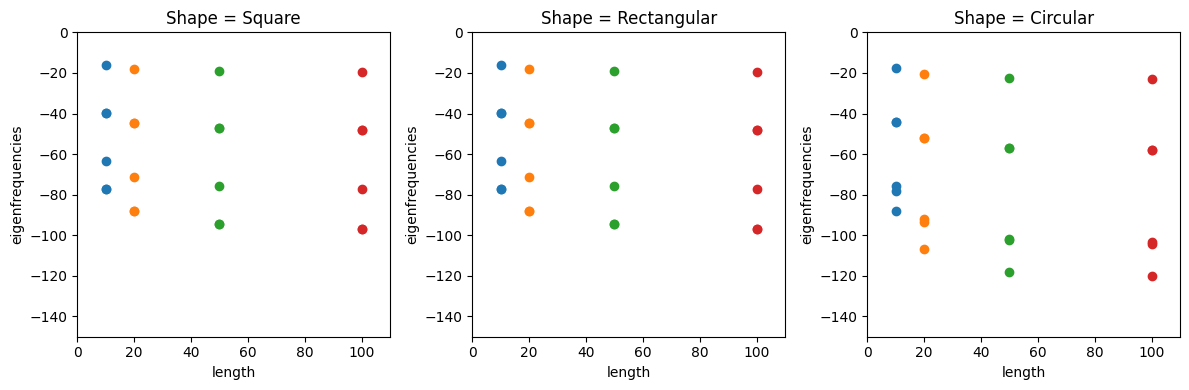

In [2]:
# square domain
modes = 6
lengths = [10, 20, 50, 100]
LL_eigenfreqs = []

LL_eigenfreqs.append(dm.eigenfreqs_lengths_square(lengths))
LL_eigenfreqs.append(dm.eigenfreqs_lengths_rectangle(lengths))
LL_eigenfreqs.append(dm.eigenfreqs_lengths_circular([x-1 for x in lengths]))

dm.visualise_eigenfreqs_lengths(lengths, LL_eigenfreqs)

### E: Time-dependence

$u(x,y,t) = v(x,y) T(t)$ 

where:
- $v(x,y)$ is the eiegnvector solutions (eigenmodes) found in 1.2 and 1.3
- $T(t) = A cos(c \lambda t) + B sin(c \lambda t)$

In [ ]:
t = 0

for t in range(0, 1, 0.1)
